# Monte Carlo Simulation for FE
## IEOR 4703

### Implementation of a delta-hedging strategy for a call/put option

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# import our BMS price and delta functions
from BMS import BMS_price, BMS_delta

In [2]:
spot = 100
K = 100
r = 0.0
q = 0.20
sig = 0.30

sig_0 = sig

maturity = 1

m = 365
dt = maturity/m

n_sim = 2000

### Exact value of call/put

In [3]:
C = BMS_price('call', spot, K, r, q, sig, maturity)
print('Value of the call = ' + str(C))

P = BMS_price('put', spot, K, r, q, sig, maturity)
print('Value of the put = ' + str(P))

Value of the call = 4.0765769561251695
Value of the put = 22.203501648326977


### Delta-hedging strategy

In [4]:
np.random.seed(316713411)
z = np.random.randn(n_sim,m)

In [5]:
synthetic_C = np.zeros(n_sim)
synthetic_P = np.zeros(n_sim)

st = time()

for j in range(n_sim):

    # reset for each path
    S = spot
    T = maturity
    # temp variables for hedging
    delta_C_prev = 0.0
    delta_P_prev = 0.0

    for i in range(m):

        delta_C = BMS_delta('call', S, K, r, q, sig, T)
        delta_P = BMS_delta('put',  S, K, r, q, sig, T)

        #synthetic_C[j] += (delta_C - delta_C_prev)*S
        #synthetic_P[j] += (delta_P - delta_P_prev)*S

        synthetic_C[j] += (delta_C - delta_C_prev)*S * np.exp(-r*i*dt) * np.exp(q*i*dt)
        synthetic_P[j] += (delta_P - delta_P_prev)*S * np.exp(-r*i*dt) * np.exp(q*i*dt)

        delta_C_prev = delta_C
        delta_P_prev = delta_P

        S = S * np.exp((r - q - sig*sig/2)*dt + sig*np.sqrt(dt)*z[j,i])

        T = T - dt

    #synthetic_C[j] += -delta_C*S
    #synthetic_P[j] += -delta_P*S

    synthetic_C[j] += -delta_C*S * np.exp(-r*maturity) * np.exp(q*maturity)
    synthetic_P[j] += -delta_P*S * np.exp(-r*maturity) * np.exp(q*maturity)

    #synthetic_C[j] += np.maximum(S-K,0)
    #synthetic_P[j] += np.maximum(K-S,0)

    # discounting the payoff
    synthetic_C[j] += np.exp(-r*maturity)*np.maximum(S-K,0)
    synthetic_P[j] += np.exp(-r*maturity)*np.maximum(K-S,0)


et = time()
print('Elapsed time is %s seconds.' % str(et - st))

Elapsed time is 172.4547884464264 seconds.


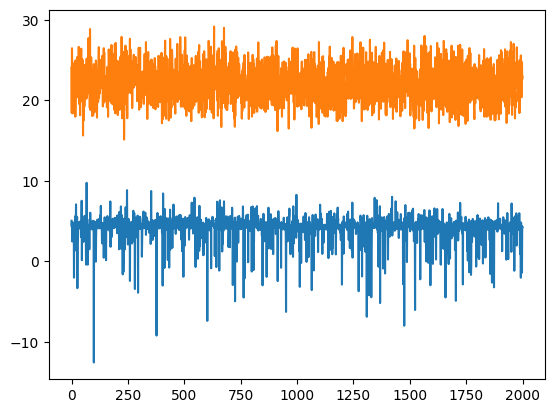

In [6]:
plt.plot(synthetic_C)
plt.plot(synthetic_P)
plt.show()

In [7]:
print('Exact value vs. cost of (constant) delta hedging for r='+ str(r) + ', q=' + str(q))
#
print('')
print('synthetic_C = ' + str(np.mean(synthetic_C)) + ' vs exact call =', str(C))
print('std_C = ' + str(np.std(synthetic_C, ddof=1)))
#
print('')
print('synthetic_P = ' + str(np.mean(synthetic_P)) + ' vs exact put =', str(P))
print('std_P = ' + str(np.std(synthetic_P, ddof=1)))

Exact value vs. cost of (constant) delta hedging for r=0.0, q=0.2

synthetic_C = 4.104547884839728 vs exact call = 4.0765769561251695
std_C = 1.6907044254206254

synthetic_P = 22.24719589707956 vs exact put = 22.203501648326977
std_P = 2.3153032007983474
